The columns and their respectives meanings
* Year: The year the export or import occurred. Either 2016 or 2017.
* App: The appendix the species belongs to. Appendix I species are the most protected, and Appendix III species are the least. For more on appendices, refer to the `Context` section of the dataset description.
* Taxon: The species' taxonomic taxon.
* Class: The species' taxonomic class.
* Order: The species' taxonomic order.
* Family: The species' taxonomic family.
* Genius: The species' taxonomic genus (or equivalently, its "scientific name").
* Importer: The country importing the species. An [ISO_3166-1_alpha_2](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2) code. Left blank if this is an export record.
* Exporter: The country exporting the species. An [ISO_3166-1_alpha_2](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2) code. Left blank if this an import record.

* Origin: The country from which the species originated. An [ISO_3166-1_alpha_2](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2) code.
* Importer reported quantity: The quantity the good the importer reported to CITES. Blank if this an export record. Contextualized by the `Term` column.
* Exporter reported quantity: How many copies of the good the exporter reported to CITES. Blank if this an import record. Contextualized by the `Term` column.
* Term:The good being exported or imported. `live` for live specimens, `skin` for animal skins, and so on.
* Unit:If a request quantity was provided, the type of quantity recorded. E.g. `g` for grams, or `lbs` for pounds. If no term is provided, the the reported quantity is probably a unit quantity (e.g. "4 fir trees").
* Purpose:The purpose with which the species was exported or imported. One-letter code. For translations on what the codes means refer to [the CITES documentation](https://trade.cites.org/cites_trade_guidelines/en-CITES_Trade_Database_Guide.pdf).
* Source:Describes how the animal or plant species was brought onto the market: bred, captured wild, zoo specimen, etcetera. One-letter code. For translations on what the codes means refer to [the CITES documentation](https://trade.cites.org/cites_trade_guidelines/en-CITES_Trade_Database_Guide.pdf).











Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Data/biodiverse.csv")

In [ ]:
df.head(3)

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C
1,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,XV,RS,RS,NaN,1.0,bodies,NaN,Q,O
2,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,feathers,NaN,S,W


In [ ]:
df.shape

(67161, 16)

In [ ]:
df.isnull().sum()

Year                              0
App.                              0
Taxon                             0
Class                         20224
Order                            57
Family                          461
Genus                          1459
Importer                         71
Exporter                        573
Origin                        41518
Importer reported quantity    35295
Exporter reported quantity    23140
Term                              0
Unit                          60759
Purpose                        6059
Source                          544
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67161 entries, 0 to 67160
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        67161 non-null  int64  
 1   App.                        67161 non-null  object 
 2   Taxon                       67161 non-null  object 
 3   Class                       46937 non-null  object 
 4   Order                       67104 non-null  object 
 5   Family                      66700 non-null  object 
 6   Genus                       65702 non-null  object 
 7   Importer                    67090 non-null  object 
 8   Exporter                    66588 non-null  object 
 9   Origin                      25643 non-null  object 
 10  Importer reported quantity  31866 non-null  float64
 11  Exporter reported quantity  44021 non-null  float64
 12  Term                        67161 non-null  object 
 13  Unit                        640

In [ ]:
#check for the number of unique values/categories in each column
for i in df.columns:
    print(i,df[i].nunique())

Year 2
App. 4
Taxon 6382
Class 16
Order 101
Family 252
Genus 1340
Importer 216
Exporter 211
Origin 179
Importer reported quantity 3739
Exporter reported quantity 5377
Term 83
Unit 13
Purpose 12
Source 10


#### check the cardinality

In [ ]:
def cardinality(data):
    for col in df.columns:
        print(f" the cardinality of {col} is", df[col].value_counts())
cardinality(df)

 the cardinality of Year is 2016    67007
2017      154
Name: Year, dtype: int64
 the cardinality of App. is II     59253
I       5976
III     1739
N        193
Name: App., dtype: int64
 the cardinality of Taxon is Crocodylus niloticus          2417
Python reticulatus            2309
Alligator mississippiensis    2099
Crocodylus porosus            1404
Varanus salvator               960
                              ... 
Dactylorhiza maculata            1
Dactylorhiza majalis             1
Dendrobium acinaciforme          1
Dendrobium acutilingue           1
Threnetes niger                  1
Name: Taxon, Length: 6382, dtype: int64
 the cardinality of Class is Reptilia          18430
Anthozoa           8781
Mammalia           8505
Aves               6861
Actinopteri        2759
Amphibia            420
Insecta             310
Bivalvia            269
Gastropoda          191
Hydrozoa            181
Elasmobranchii      113
Arachnida            67
Hirudinoidea         34
Holothuroidea      

### App.
appendice is an import aspect as it tells the group of species that are likely to fall into extinction

In [ ]:
print("there are", df["App."].nunique(), "unique values in the appendice (App.)")
print(df["App."].value_counts())

there are 4 unique values in the appendice (App.)
II     59253
I       5976
III     1739
N        193
Name: App., dtype: int64


accordaing to the report, appendix I speacies are the most protected and Appendix III species are the list protected. Appendix II has the highest number

In [ ]:
df["App."].isnull().sum()

0

Appendix has no null value, Appendix can be import here as well

the importer has  1 zero quantity
the Export has  0 zero quantity


Text(0.5, 1.0, 'Relative difference in known trade amounts compared to sum of all trades')

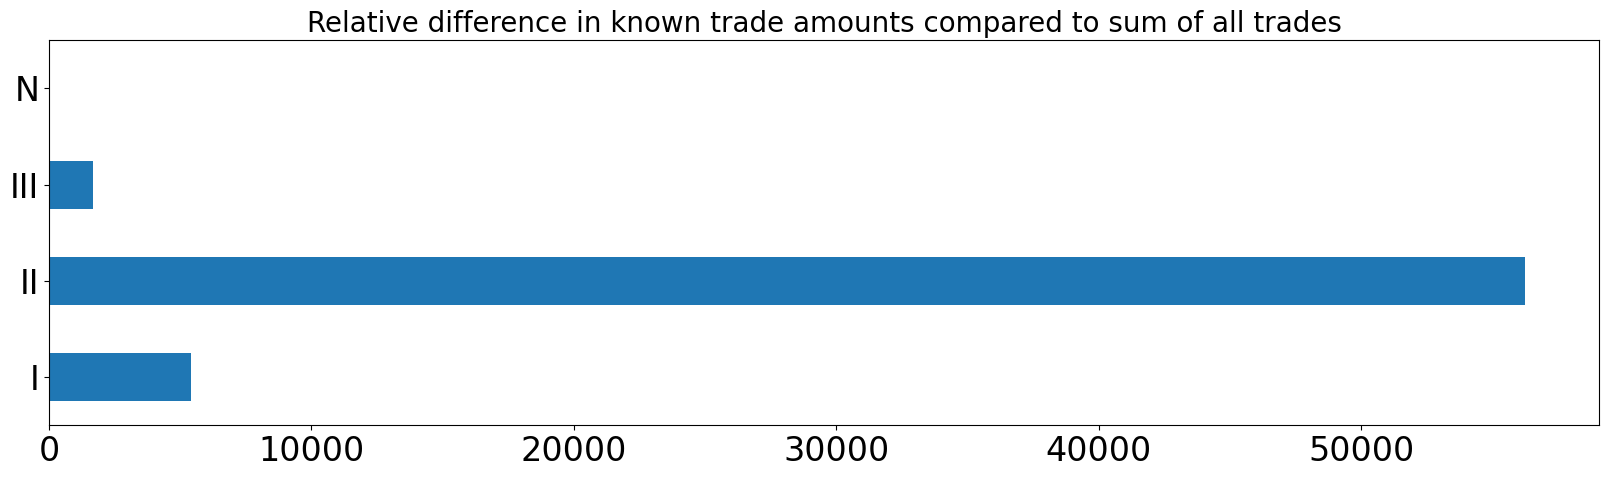

In [ ]:
# let's do some visualization on appendix
appendice = df['App.'].value_counts()
known_amounts = df.loc[df['Importer reported quantity']==df['Exporter reported quantity'], 'App.'].value_counts()
y = appendice - known_amounts
y.plot.barh(figsize=(20,5), fontsize=24)
plt.title('Relative difference in known trade amounts compared to sum of all trades', fontsize=20)


In [ ]:
#groupby_app = df.groupby("App.")

In [ ]:
# let us take a look at the Importer quantity
print(df["Importer reported quantity"].nunique())
print(df["Importer reported quantity"].value_counts())

3739
1.0       4537
2.0       2734
3.0       1416
5.0       1376
10.0      1241
          ... 
7008.0       1
1071.0       1
3780.0       1
6202.0       1
35.2         1
Name: Importer reported quantity, Length: 3739, dtype: int64


In [ ]:
#check some statistics for the importer and expoter quantity
print(df["Importer reported quantity"].mean())
print(df["Importer reported quantity"].std())
print(df["Importer reported quantity"].min())
print(df["Importer reported quantity"].max())
print(df["Importer reported quantity"].skew())
print(df["Importer reported quantity"].kurt())

4382.425367873032
144910.27423501055
0.0
19524978.0
95.48267976618465
11333.745149726865


In [ ]:
print(df["Exporter reported quantity"].mean())
print(df["Exporter reported quantity"].std())
print(df["Exporter reported quantity"].min())
print(df["Exporter reported quantity"].max())
print(df["Exporter reported quantity"].skew())
print(df["Exporter reported quantity"].kurt())

4443.878400524784
157379.3569882144
2e-06
21543618.0
94.15250027670125
10734.78145416067


In [ ]:
# check the exporter and importer missing values
print(df["Importer reported quantity"].isnull().sum())
print(df["Exporter reported quantity"].isnull().sum())

35295
23140


both Importer and and Exporter has really large number of non values, and they are both really skewwed.


In [ ]:
#just check to see if there are zero importation and exportation
print("the importer has ",(df['Importer reported quantity']== 0).sum(), "zero quantity")
print("the Export has ", (df['Exporter reported quantity']== 0).sum(), "zero quantity")

the importer has  1 zero quantity
the Export has  0 zero quantity


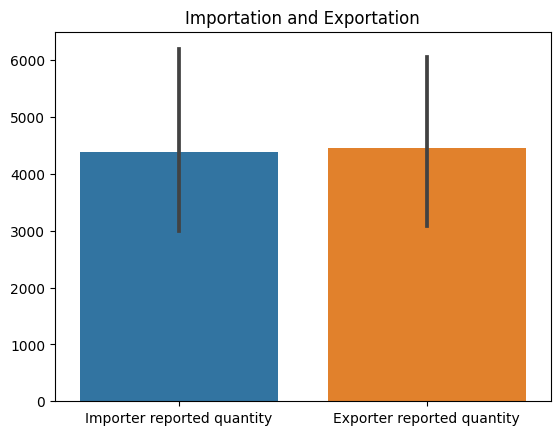

In [ ]:
sns.barplot(data =df[["Importer reported quantity", "Exporter reported quantity"]])
plt.title("Importation and Exportation")
plt.show()

It is obvious here that the exportation rate is higher than the importation.

Text(0.5, 1.0, 'Amount of exported goods per trade')

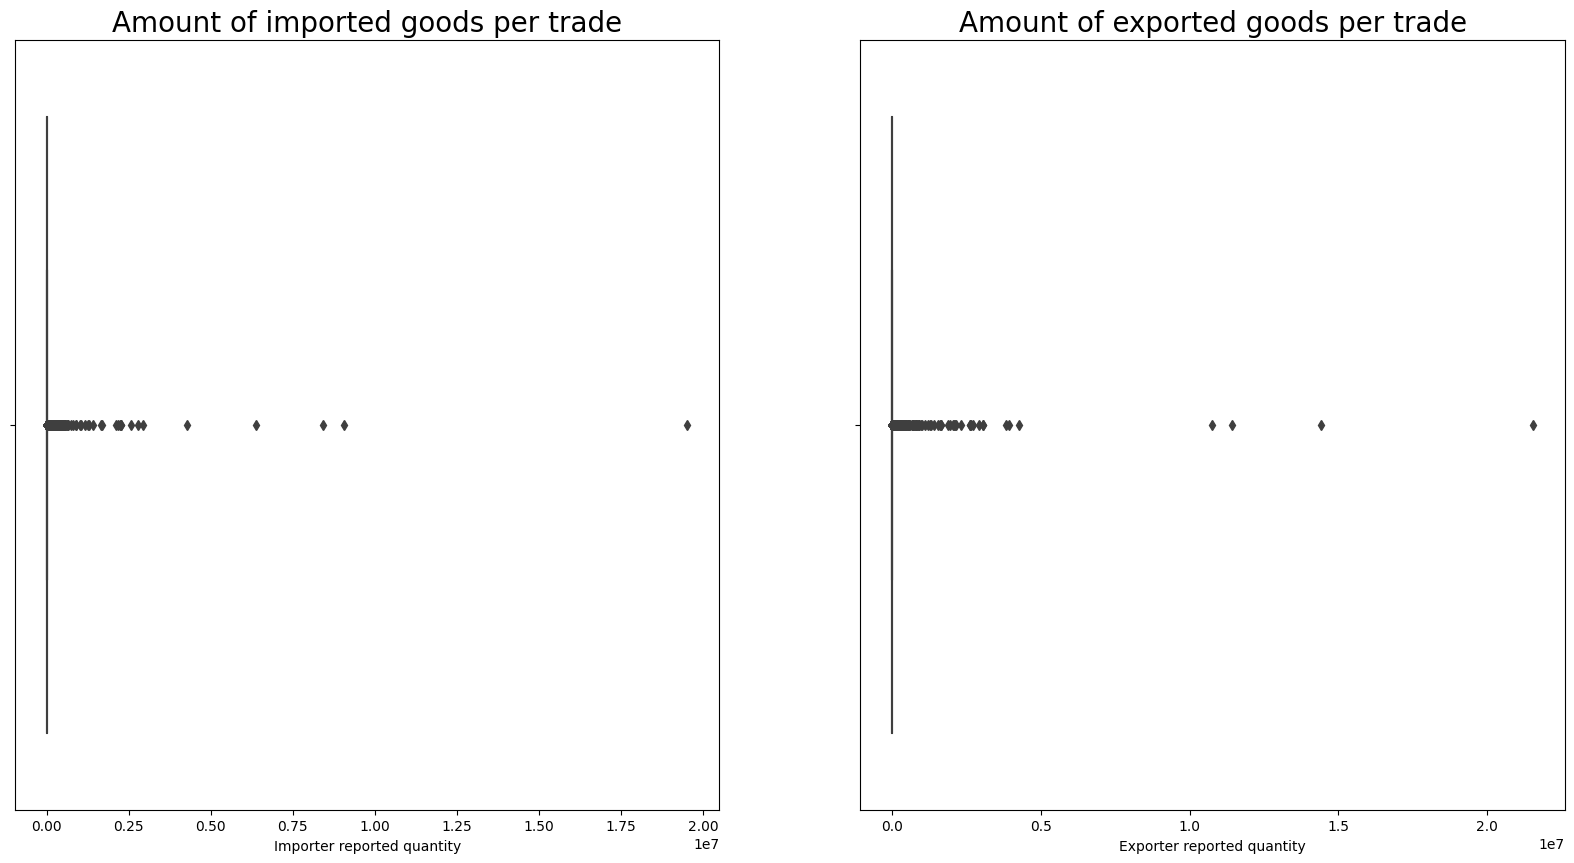

In [ ]:
# let's check some outliers from both importer and exporter
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.boxplot(data = df, x='Importer reported quantity')
plt.title('Amount of imported goods per trade', fontsize=20)

plt.subplot(122)
sns.boxplot(data = df, x='Exporter reported quantity')
plt.title('Amount of exported goods per trade', fontsize=20)


There are really large number of outliers for both columns ( i.e importer and Exporter )

Text(0.5, 1.0, 'Amount of exported goods per trade')

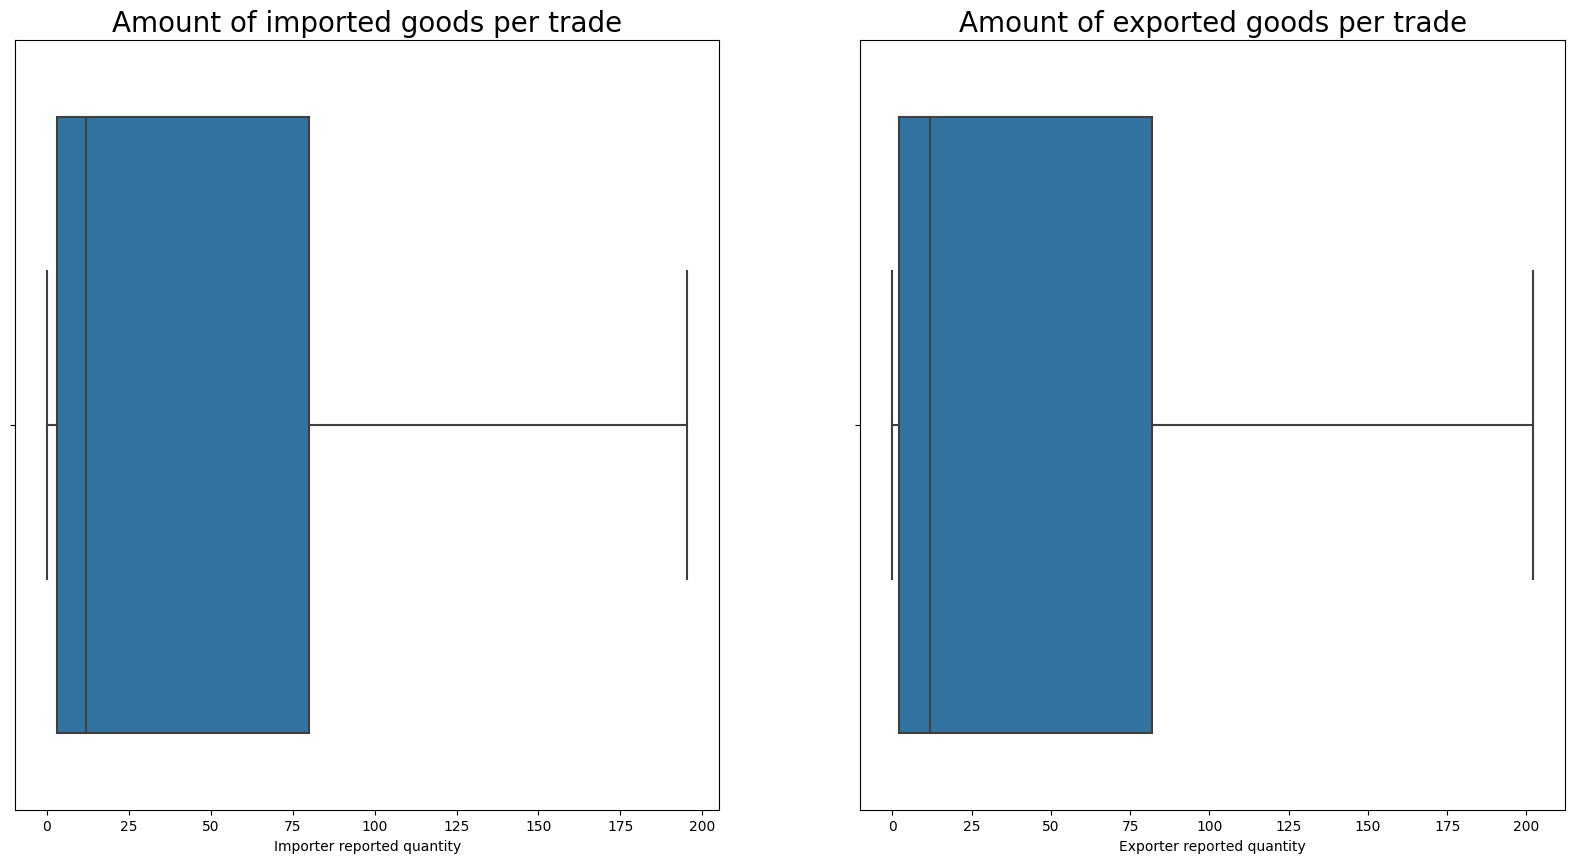

In [ ]:
# remove the outliers and check
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.boxplot(data = df, x='Importer reported quantity', showfliers = False)
plt.title('Amount of imported goods per trade', fontsize=20)

plt.subplot(122)
sns.boxplot(data = df, x='Exporter reported quantity', showfliers = False)
plt.title('Amount of exported goods per trade', fontsize=20)


<Axes: xlabel='Importer reported quantity', ylabel='Exporter reported quantity'>

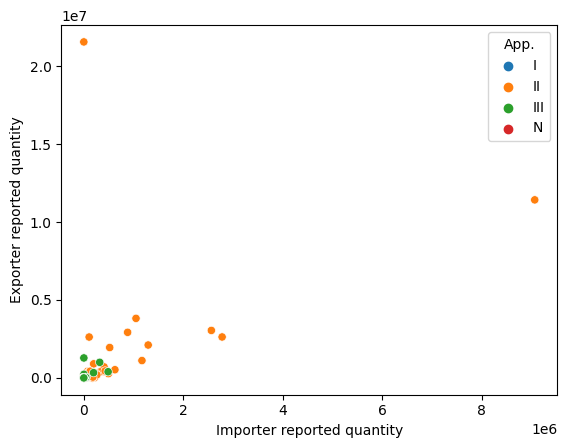

In [ ]:
#let's plot a scatterplot and see the importation and Exportation
sns.scatterplot(data =df, y = df["Exporter reported quantity"], x = df["Importer reported quantity"], hue= "App.")

Appendix I species are the most protected, and Appendix III species are the least

<Axes: xlabel='Exporter reported quantity', ylabel='Density'>

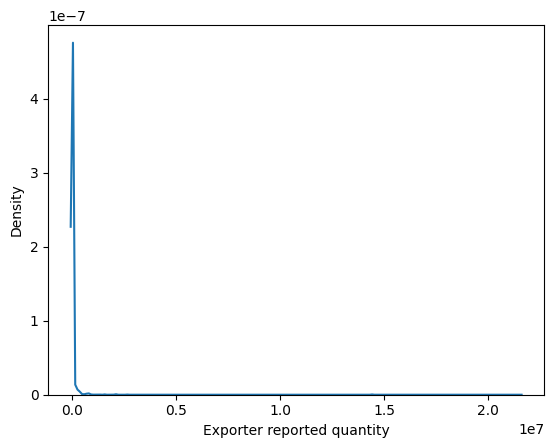

In [ ]:
sns.kdeplot(data = df['Exporter reported quantity'])

<Axes: xlabel='Importer reported quantity', ylabel='Density'>

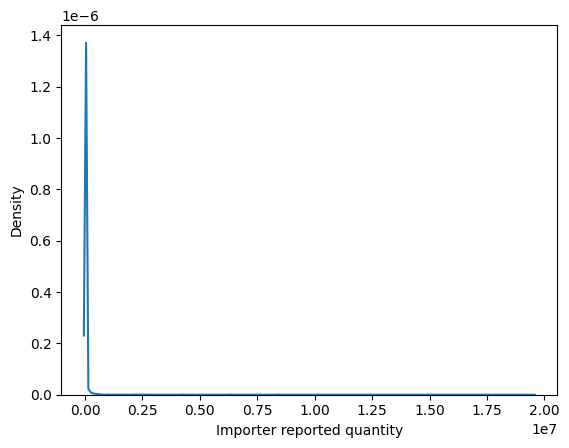

In [ ]:
sns.kdeplot(data = df['Importer reported quantity'])

a highly skewwed data

<ipython-input-62-820198c7a3d6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm" );


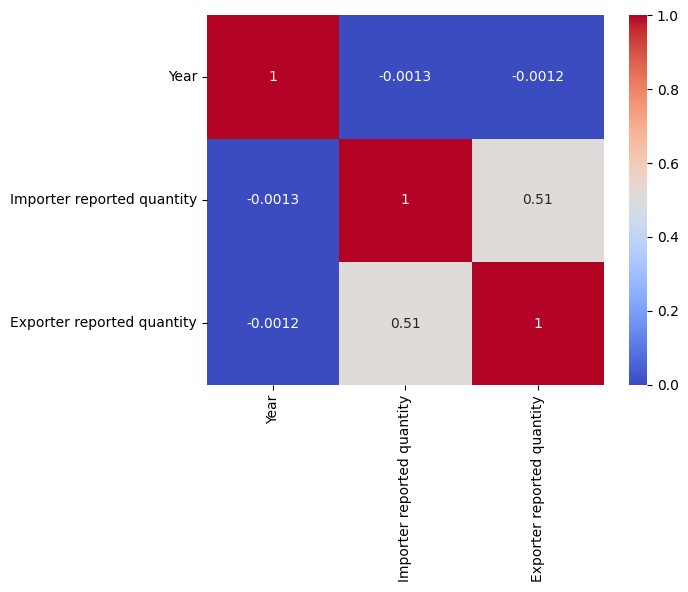

In [ ]:
# check for the correlation
sns.heatmap(df.corr(),annot=True,cmap="coolwarm" );

we can see that there are some positive correlation between the import and export quantity

In [ ]:
df.columns

Index(['Year', 'App.', 'Taxon', 'Class', 'Order', 'Family', 'Genus',
       'Importer', 'Exporter', 'Origin', 'Importer reported quantity',
       'Exporter reported quantity', 'Term', 'Unit', 'Purpose', 'Source'],
      dtype='object')

### Class
### let's take a look at class

In [ ]:
print("there are", df["Class"].nunique(), "number of unique values")
print(df["Class"].value_counts())

there are 16 number of unique values
Reptilia          18430
Anthozoa           8781
Mammalia           8505
Aves               6861
Actinopteri        2759
Amphibia            420
Insecta             310
Bivalvia            269
Gastropoda          191
Hydrozoa            181
Elasmobranchii      113
Arachnida            67
Hirudinoidea         34
Holothuroidea        10
Dipneusti             4
Coelacanthi           2
Name: Class, dtype: int64


there area 16 classes

In [ ]:
# Drop the nan values in the class
drop_for_classes=df["Class"].dropna()
drop_for_classes.isnull().sum()

0

In [ ]:
df["Class"].dropna(inplace = True)

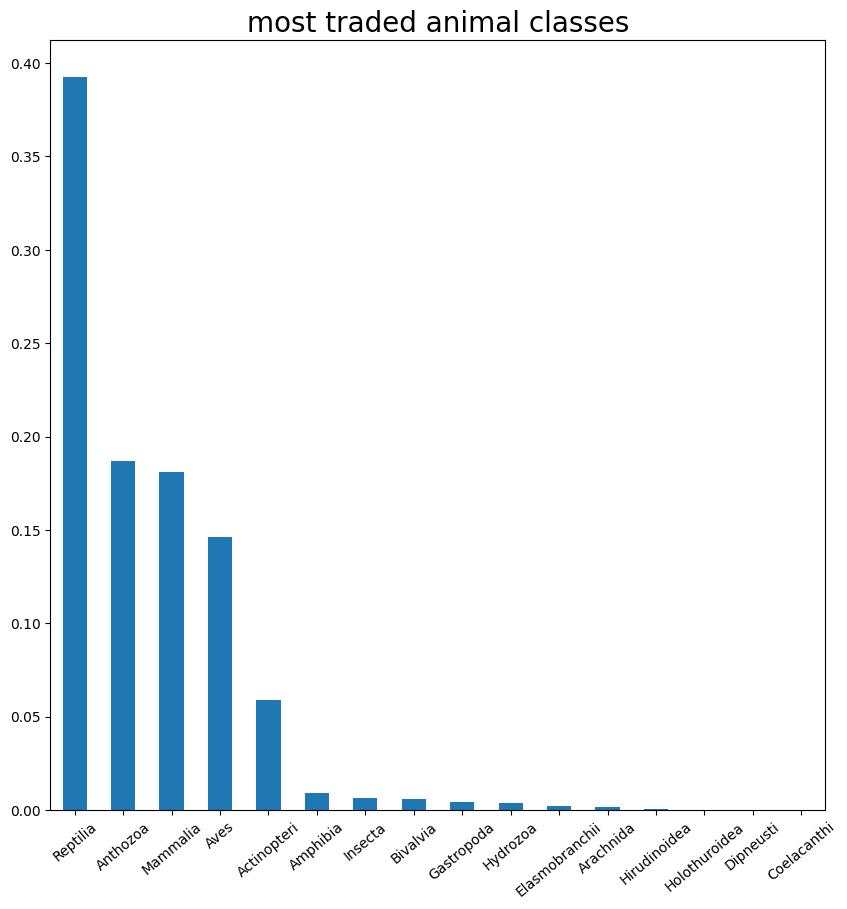

In [ ]:
# plot and see the higest traded animal in class
classes = df['Class'].value_counts(normalize = True)
pd.DataFrame(classes)
plt.figure(figsize=(10,10))
classes.plot(kind = "bar")
plt.title('most traded animal classes', fontsize=20)
plt.xticks(rotation=40)
#plt.figure(figsize=(10,10))
plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'W'),
  Text(1, 0, 'A'),
  Text(2, 0, 'C'),
  Text(3, 0, 'F'),
  Text(4, 0, 'I'),
  Text(5, 0, 'O'),
  Text(6, 0, 'D'),
  Text(7, 0, 'R'),
  Text(8, 0, 'U'),
  Text(9, 0, 'X')])

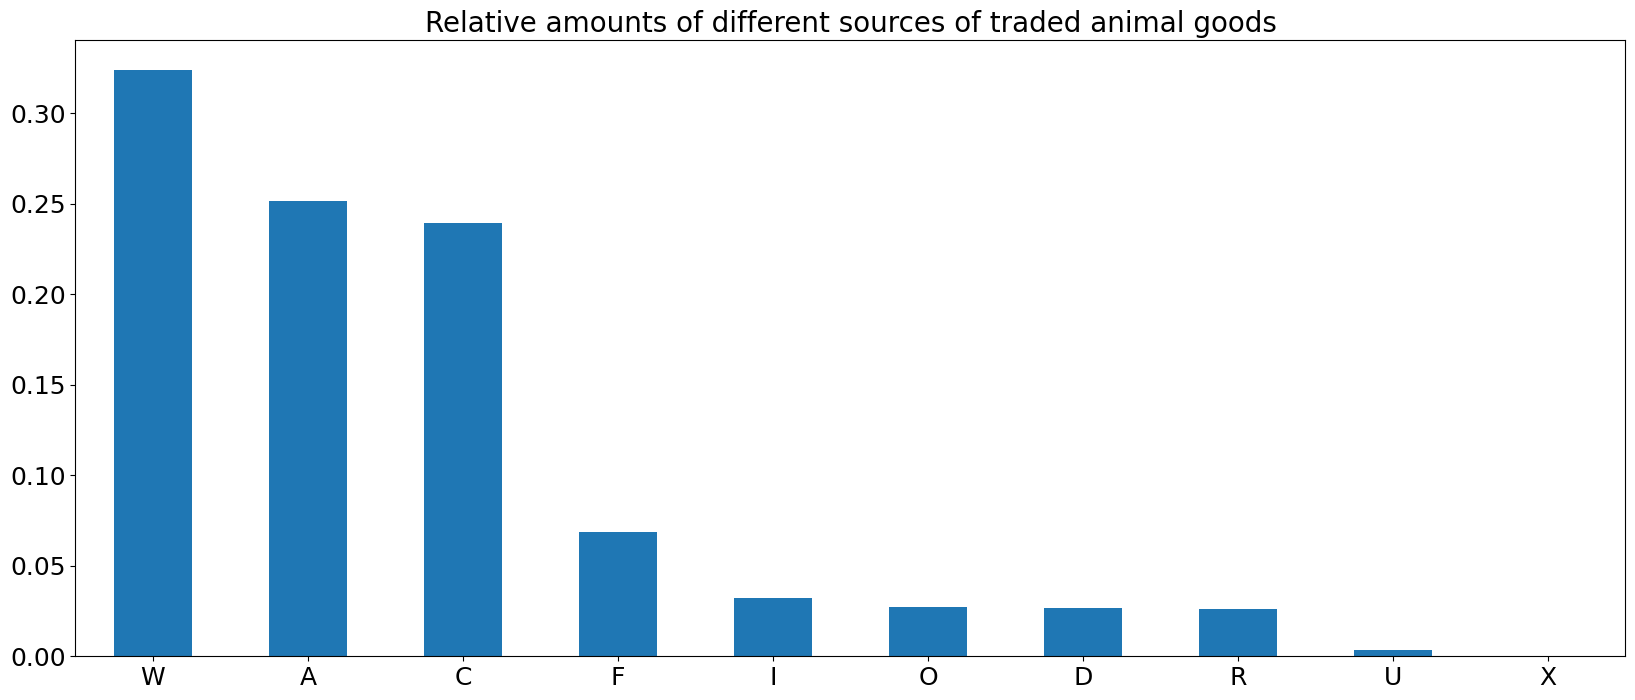

In [11]:
# let's look at the sources and see well it can be of help
plt.figure(figsize=(20,8))
df['Source'].value_counts(normalize=True).plot(kind='bar', fontsize=18)
plt.title('Relative amounts of different sources of traded animal goods', fontsize=20)
plt.xticks(rotation=0) #  this rotates the labels of x-axis by 90°
